In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import csv

from scipy.interpolate import make_interp_spline, make_lsq_spline
import rpy2.robjects as robjects
import pyreadr
import sys
import csv

sys.path.append("../../src/Utility")

from utility import plot_multiple_roc
from os.path import exists

In [8]:
def split_string(slist):
    mean = []
    std = []
    N = []
    for s in slist:
        arr = s.split()
        mean.append(float(arr[7]))
        std.append(float(arr[8]))
        N.append(int(arr[1]))
    p = int(arr[3])
    out = {}
    out['mean'] = mean
    out['std'] = std
    out['N'] = N
    out['p'] = p
    return(out)

In [16]:
con_nonuni_1 = [
"N= 324 p= 100 avg norm squared:  3.43439524190467 1.66427525987498",
"N= 360 p= 100 avg norm squared:  3.31040532379661 1.58888359641424",
"N= 405 p= 100 avg norm squared:  3.40272897437277 1.95958262291655",
"N= 462 p= 100 avg norm squared:  3.24064702486491 1.31888353929031",
"N= 540 p= 100 avg norm squared:  2.77805308054146 1.48736497200733",
"N= 648 p= 100 avg norm squared:  2.31902687975959 0.343324716409838",
"N= 810 p= 100 avg norm squared:  3.25962567937145 1.67464567821086",
"N= 1080 p= 100 avg norm squared:  2.05291270593344 1.15268704253547",
"N= 1620 p= 100 avg norm squared:  1.89430061354619 0.762888841780544",
"N= 3240 p= 100 avg norm squared:  2.20065136423943 1.05248223997838",
"N= 16200 p= 100 avg norm squared:  1.9503742779802 0.720181877913435"
]

con_nonuni_2 = [
"N= 324 p= 100 avg norm squared:  2.89604055918994 0.974350481930855",
"N= 360 p= 100 avg norm squared:  2.84497905766932 1.244944796973",
"N= 405 p= 100 avg norm squared:  3.29572875597441 1.22304178306527",
"N= 462 p= 100 avg norm squared:  3.06637208833351 1.54084638638972",
"N= 540 p= 100 avg norm squared:  3.36312518760103 1.09363825873357",
"N= 648 p= 100 avg norm squared:  3.42142160965994 1.63233805911549",
"N= 810 p= 100 avg norm squared:  2.18984135742322 0.689753916424587",
"N= 1080 p= 100 avg norm squared:  2.46379278473476 1.349823523477",
"N= 1620 p= 100 avg norm squared:  2.69472582650954 1.78444819194558",
"N= 3240 p= 100 avg norm squared:  1.59140195100061 0.921102863422253",
"N= 16200 p= 100 avg norm squared:  2.41518134704145 1.71200631989754"
]

con_nonuni_3 = [
"N= 324 p= 100 avg norm squared:  3.53424959720154 1.59834796887683",
"N= 360 p= 100 avg norm squared:  2.94705740772492 1.59777726144213",
"N= 405 p= 100 avg norm squared:  3.88986924862885 1.80468877866762",
"N= 462 p= 100 avg norm squared:  2.16447617731584 0.685102289110917",
"N= 540 p= 100 avg norm squared:  2.83936622885311 1.06793879136208",
"N= 648 p= 100 avg norm squared:  2.77012217609744 0.993143757435917",
"N= 810 p= 100 avg norm squared:  2.31817676055515 0.71100371079689",
"N= 1080 p= 100 avg norm squared:  2.50592890288999 0.811398247248726",
"N= 1620 p= 100 avg norm squared:  2.62256290236101 0.868780750942436",
"N= 3240 p= 100 avg norm squared:  2.4858883999762 1.86985393565979",
"N= 16200 p= 100 avg norm squared:  1.65902990122405 0.397334460511889"
]

con_nonuni = {}
con_nonuni['tridiag1'] = split_string(con_nonuni_1)
con_nonuni['tridiag2'] = split_string(con_nonuni_2)
con_nonuni['tridiag3'] = split_string(con_nonuni_3)

print(con_nonuni)


{'tridiag1': {'mean': [3.43439524190467, 3.31040532379661, 3.40272897437277, 3.24064702486491, 2.77805308054146, 2.31902687975959, 3.25962567937145, 2.05291270593344, 1.89430061354619, 2.20065136423943, 1.9503742779802], 'std': [1.66427525987498, 1.58888359641424, 1.95958262291655, 1.31888353929031, 1.48736497200733, 0.343324716409838, 1.67464567821086, 1.15268704253547, 0.762888841780544, 1.05248223997838, 0.720181877913435], 'N': [324, 360, 405, 462, 540, 648, 810, 1080, 1620, 3240, 16200], 'p': 100}, 'tridiag2': {'mean': [2.89604055918994, 2.84497905766932, 3.29572875597441, 3.06637208833351, 3.36312518760103, 3.42142160965994, 2.18984135742322, 2.46379278473476, 2.69472582650954, 1.59140195100061, 2.41518134704145], 'std': [0.974350481930855, 1.244944796973, 1.22304178306527, 1.54084638638972, 1.09363825873357, 1.63233805911549, 0.689753916424587, 1.349823523477, 1.78444819194558, 0.921102863422253, 1.71200631989754], 'N': [324, 360, 405, 462, 540, 648, 810, 1080, 1620, 3240, 16200

In [17]:
con_uni_1 = [
"N= 324 p= 100 avg norm squared:  2.3344645219786 1.03699412333727",
"N= 360 p= 100 avg norm squared:  1.94462043154065 0.822568076132266",
"N= 405 p= 100 avg norm squared:  1.77652370459175 0.943137102797405",
"N= 462 p= 100 avg norm squared:  1.80395716732694 0.80636603822243",
"N= 540 p= 100 avg norm squared:  2.18072188222042 0.990424258824444",
"N= 648 p= 100 avg norm squared:  1.59740859035799 1.08414001130728",
"N= 810 p= 100 avg norm squared:  1.45735238338278 0.654650325075033",
"N= 1080 p= 100 avg norm squared:  0.961316204742854 0.229912918763753",
"N= 1620 p= 100 avg norm squared:  0.722282842792109 0.295354158004651",
"N= 3240 p= 100 avg norm squared:  0.533534755622188 0.194313313014024",
"N= 16200 p= 100 avg norm squared:  0.364665731438673 0.0890811353503388"
]

con_uni_2 = [
"N= 324 p= 100 avg norm squared:  1.9278946995101 0.916324645835421",
"N= 360 p= 100 avg norm squared:  2.27375819767808 1.30285823789796",
"N= 405 p= 100 avg norm squared:  1.85659679709627 0.976237503933379",
"N= 462 p= 100 avg norm squared:  1.69280674848309 1.62691677512756",
"N= 540 p= 100 avg norm squared:  1.78571919702294 1.16842545253114",
"N= 648 p= 100 avg norm squared:  1.29315157628818 0.94406666841781",
"N= 810 p= 100 avg norm squared:  0.961920669393141 0.399266667628901",
"N= 1080 p= 100 avg norm squared:  0.667685480474736 0.408937244494743",
"N= 1620 p= 100 avg norm squared:  0.414721560737044 0.18674551493574",
"N= 3240 p= 100 avg norm squared:  0.251789245222176 0.219415869767592",
"N= 16200 p= 100 avg norm squared:  0.0587125613919089 0.00977629986392267"
]

con_uni_3 = [
"N= 324 p= 100 avg norm squared:  2.45967337628521 0.742467137089468",
"N= 360 p= 100 avg norm squared:  2.00546057059669 0.801508040563279",
"N= 405 p= 100 avg norm squared:  2.59410692696393 1.05113726341454",
"N= 462 p= 100 avg norm squared:  2.29891405555069 1.01459005527873",
"N= 540 p= 100 avg norm squared:  2.78730751178536 1.56919110252621",
"N= 648 p= 100 avg norm squared:  1.44921626508117 1.04860594982193",
"N= 810 p= 100 avg norm squared:  1.33973564578666 0.51868817321142",
"N= 1080 p= 100 avg norm squared:  1.31654944713742 0.538437082691354",
"N= 1620 p= 100 avg norm squared:  1.06715760152465 0.366250290952206",
"N= 3240 p= 100 avg norm squared:  0.920890651113928 0.185850729936749",
"N= 16200 p= 100 avg norm squared:  0.818662043931181 0.107777712491296"
]

con_uni = {}
con_uni['tridiag1'] = split_string(con_uni_1)
con_uni['tridiag2'] = split_string(con_uni_2)
con_uni['tridiag3'] = split_string(con_uni_3)

print(con_uni)

{'tridiag1': {'mean': [2.3344645219786, 1.94462043154065, 1.77652370459175, 1.80395716732694, 2.18072188222042, 1.59740859035799, 1.45735238338278, 0.961316204742854, 0.722282842792109, 0.533534755622188, 0.364665731438673], 'std': [1.03699412333727, 0.822568076132266, 0.943137102797405, 0.80636603822243, 0.990424258824444, 1.08414001130728, 0.654650325075033, 0.229912918763753, 0.295354158004651, 0.194313313014024, 0.0890811353503388], 'N': [324, 360, 405, 462, 540, 648, 810, 1080, 1620, 3240, 16200], 'p': 100}, 'tridiag2': {'mean': [1.9278946995101, 2.27375819767808, 1.85659679709627, 1.69280674848309, 1.78571919702294, 1.29315157628818, 0.961920669393141, 0.667685480474736, 0.414721560737044, 0.251789245222176, 0.0587125613919089], 'std': [0.916324645835421, 1.30285823789796, 0.976237503933379, 1.62691677512756, 1.16842545253114, 0.94406666841781, 0.399266667628901, 0.408937244494743, 0.18674551493574, 0.219415869767592, 0.00977629986392267], 'N': [324, 360, 405, 462, 540, 648, 810,

In [18]:
single_nonuni_1 = [
"N= 324 p= 100 avg norm squared:  2.88924993122787 0.981644064984691",
"N= 360 p= 100 avg norm squared:  3.03295970325902 1.64080183209289",
"N= 405 p= 100 avg norm squared:  2.47978454869931 0.794377752438644",
"N= 462 p= 100 avg norm squared:  3.28798396348678 1.31469449165465",
"N= 540 p= 100 avg norm squared:  2.59605916360624 1.07775334051544",
"N= 648 p= 100 avg norm squared:  2.75723209613979 1.55878261682126",
"N= 810 p= 100 avg norm squared:  3.87473110227061 1.50006874116145",
"N= 1080 p= 100 avg norm squared:  1.79346831445357 0.700022382009613",
"N= 1620 p= 100 avg norm squared:  2.21355167520661 0.704752176860526",
"N= 3240 p= 100 avg norm squared:  1.71012239747744 0.986544925558533",
"N= 16200 p= 100 avg norm squared:  2.36997576968671 1.38896232588702"
]

single_nonuni_2 = [
"N= 324 p= 100 avg norm squared:  2.55799645361376 0.781399400579794",
"N= 360 p= 100 avg norm squared:  3.38288792008307 1.51243624811246",
"N= 405 p= 100 avg norm squared:  3.76234525223273 1.35516075146795",
"N= 462 p= 100 avg norm squared:  2.44093625277555 0.875297367003284",
"N= 540 p= 100 avg norm squared:  2.73749284226987 1.02715391827069",
"N= 648 p= 100 avg norm squared:  2.27408114319398 0.825376169543916",
"N= 810 p= 100 avg norm squared:  2.95589493334256 0.856372415516115",
"N= 1080 p= 100 avg norm squared:  3.01412881205297 1.19132759894067",
"N= 1620 p= 100 avg norm squared:  2.19832133890478 0.905727132174806",
"N= 3240 p= 100 avg norm squared:  2.42525386247878 0.705972184413601",
"N= 16200 p= 100 avg norm squared:  1.64537803625917 0.516624234617087"
]

single_nonuni_3 = [
"N= 324 p= 100 avg norm squared:  3.15195565768057 0.935025034060204",
"N= 360 p= 100 avg norm squared:  3.46877205391178 1.92033196292324",
"N= 405 p= 100 avg norm squared:  3.02456460951954 1.30801837169681",
"N= 462 p= 100 avg norm squared:  2.63534257671505 1.25097902423801",
"N= 540 p= 100 avg norm squared:  2.66690399357865 0.988476482466469",
"N= 648 p= 100 avg norm squared:  2.88054293199176 0.996007500948298",
"N= 810 p= 100 avg norm squared:  2.96443638636009 1.27806373745078",
"N= 1080 p= 100 avg norm squared:  2.4667334290669 1.3960629195513",
"N= 1620 p= 100 avg norm squared:  2.55228854733908 0.778896686791516",
"N= 3240 p= 100 avg norm squared:  2.81872768132042 1.00725041825096",
"N= 16200 p= 100 avg norm squared:  2.82056591168566 1.16919190437244"
]


single_nonuni = {}
single_nonuni['tridiag1'] = split_string(single_nonuni_1)
single_nonuni['tridiag2'] = split_string(single_nonuni_2)
single_nonuni['tridiag3'] = split_string(single_nonuni_3)

print(single_nonuni)

{'tridiag1': {'mean': [2.88924993122787, 3.03295970325902, 2.47978454869931, 3.28798396348678, 2.59605916360624, 2.75723209613979, 3.87473110227061, 1.79346831445357, 2.21355167520661, 1.71012239747744, 2.36997576968671], 'std': [0.981644064984691, 1.64080183209289, 0.794377752438644, 1.31469449165465, 1.07775334051544, 1.55878261682126, 1.50006874116145, 0.700022382009613, 0.704752176860526, 0.986544925558533, 1.38896232588702], 'N': [324, 360, 405, 462, 540, 648, 810, 1080, 1620, 3240, 16200], 'p': 100}, 'tridiag2': {'mean': [2.55799645361376, 3.38288792008307, 3.76234525223273, 2.44093625277555, 2.73749284226987, 2.27408114319398, 2.95589493334256, 3.01412881205297, 2.19832133890478, 2.42525386247878, 1.64537803625917], 'std': [0.781399400579794, 1.51243624811246, 1.35516075146795, 0.875297367003284, 1.02715391827069, 0.825376169543916, 0.856372415516115, 1.19132759894067, 0.905727132174806, 0.705972184413601, 0.516624234617087], 'N': [324, 360, 405, 462, 540, 648, 810, 1080, 1620, 

In [19]:
single_uni_1 = [
"N= 324 p= 100 avg norm squared:  2.34880032429991 0.94081396845007",
"N= 360 p= 100 avg norm squared:  2.13172705655645 0.920860485718586",
"N= 405 p= 100 avg norm squared:  1.94670006041502 1.92333064158945",
"N= 462 p= 100 avg norm squared:  1.86440032265873 1.18565966413911",
"N= 540 p= 100 avg norm squared:  1.79962039499214 0.914171421315106",
"N= 648 p= 100 avg norm squared:  1.26489590487524 0.70960910702666",
"N= 810 p= 100 avg norm squared:  1.19839836716404 0.610851903692927",
"N= 1080 p= 100 avg norm squared:  0.95757490445649 0.454083730551211",
"N= 1620 p= 100 avg norm squared:  0.85948900732704 0.46059631030389",
"N= 3240 p= 100 avg norm squared:  0.614866356488959 0.354927111572291",
"N= 16200 p= 100 avg norm squared:  0.402318068803058 0.0942243283077286"
]

single_uni_2 = [
"N= 324 p= 100 avg norm squared:  2.84592583981288 1.67332466877561",
"N= 360 p= 100 avg norm squared:  2.32648285933003 0.613109267540101",
"N= 405 p= 100 avg norm squared:  1.50596943066645 0.364997285753227",
"N= 462 p= 100 avg norm squared:  2.29039349184435 1.49371837918848",
"N= 540 p= 100 avg norm squared:  1.74289802058351 0.778621739900552",
"N= 648 p= 100 avg norm squared:  1.24508424260924 0.675590443399398",
"N= 810 p= 100 avg norm squared:  1.18532937823628 0.706517621625799",
"N= 1080 p= 100 avg norm squared:  1.4883611472147 0.654668480582597",
"N= 1620 p= 100 avg norm squared:  0.750535093545995 0.411624967513594",
"N= 3240 p= 100 avg norm squared:  0.565031000529443 0.23199988421754",
"N= 16200 p= 100 avg norm squared:  0.354523527592042 0.118670981232943"
]

single_uni_3 = [
"N= 324 p= 100 avg norm squared:  2.75475905007943 1.7847555814928",
"N= 360 p= 100 avg norm squared:  2.85622884826377 1.47600993386522",
"N= 405 p= 100 avg norm squared:  2.32001815131885 1.13000371196238",
"N= 462 p= 100 avg norm squared:  2.39017760295587 1.21635665887939",
"N= 540 p= 100 avg norm squared:  1.91973275977854 0.921116892586621",
"N= 648 p= 100 avg norm squared:  1.58059026721198 0.57502286910076",
"N= 810 p= 100 avg norm squared:  1.80009276827689 0.583574787156493",
"N= 1080 p= 100 avg norm squared:  1.51506401861723 0.867479395462015",
"N= 1620 p= 100 avg norm squared:  1.58354587327279 0.80695150280237",
"N= 3240 p= 100 avg norm squared:  0.948839996307749 0.206270085862753",
"N= 16200 p= 100 avg norm squared:  0.819270785093458 0.124750834299521"
]


single_uni = {}
single_uni['tridiag1'] = split_string(single_uni_1)
single_uni['tridiag2'] = split_string(single_uni_2)
single_uni['tridiag3'] = split_string(single_uni_3)

print(single_uni)

{'tridiag1': {'mean': [2.34880032429991, 2.13172705655645, 1.94670006041502, 1.86440032265873, 1.79962039499214, 1.26489590487524, 1.19839836716404, 0.95757490445649, 0.85948900732704, 0.614866356488959, 0.402318068803058], 'std': [0.94081396845007, 0.920860485718586, 1.92333064158945, 1.18565966413911, 0.914171421315106, 0.70960910702666, 0.610851903692927, 0.454083730551211, 0.46059631030389, 0.354927111572291, 0.0942243283077286], 'N': [324, 360, 405, 462, 540, 648, 810, 1080, 1620, 3240, 16200], 'p': 100}, 'tridiag2': {'mean': [2.84592583981288, 2.32648285933003, 1.50596943066645, 2.29039349184435, 1.74289802058351, 1.24508424260924, 1.18532937823628, 1.4883611472147, 0.750535093545995, 0.565031000529443, 0.354523527592042], 'std': [1.67332466877561, 0.613109267540101, 0.364997285753227, 1.49371837918848, 0.778621739900552, 0.675590443399398, 0.706517621625799, 0.654668480582597, 0.411624967513594, 0.23199988421754, 0.118670981232943], 'N': [324, 360, 405, 462, 540, 648, 810, 1080,

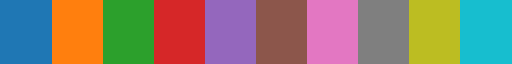

In [24]:
color_map = plt.get_cmap('tab10')
color_map

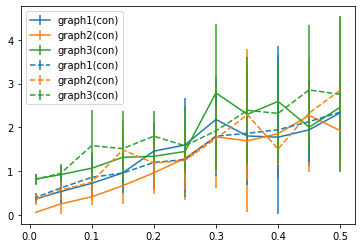

In [40]:
#plot the diagram of uniform noise
N100 = con_uni['tridiag1']['N']
x = [(81*np.log10(100)/n) for n in N100]
plt.errorbar(x=x, y=con_uni['tridiag1']['mean'], yerr=con_uni['tridiag1']['std'], label='graph1(con)', color=color_map(0))
plt.errorbar(x=x, y=con_uni['tridiag2']['mean'], yerr=con_uni['tridiag2']['std'], label='graph2(con)', color=color_map(1))
plt.errorbar(x=x, y=con_uni['tridiag3']['mean'], yerr=con_uni['tridiag3']['std'], label='graph3(con)', color=color_map(2))

plt.errorbar(x=x, y=single_uni['tridiag1']['mean'], yerr=single_uni['tridiag1']['std'], label='graph1(con)', color=color_map(0), linestyle='--')
plt.errorbar(x=x, y=single_uni['tridiag2']['mean'], yerr=single_uni['tridiag2']['std'], label='graph2(con)', color=color_map(1), linestyle='--')
plt.errorbar(x=x, y=single_uni['tridiag3']['mean'], yerr=single_uni['tridiag3']['std'], label='graph3(con)', color=color_map(2), linestyle='--')
plt.legend()
plt.show()

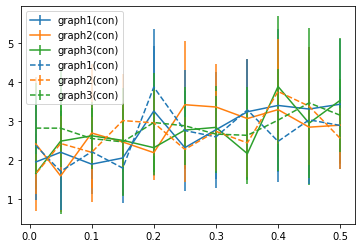

In [28]:
#plot the diagram of uniform noise
N100 = con_uni['tridiag1']['N']
x = [(81*np.log10(100)/n) for n in N100]
plt.errorbar(x=x, y=con_nonuni['tridiag1']['mean'], yerr=con_nonuni['tridiag1']['std'], label='graph1(con)', color=color_map(0))
plt.errorbar(x=x, y=con_nonuni['tridiag2']['mean'], yerr=con_nonuni['tridiag2']['std'], label='graph2(con)', color=color_map(1))
plt.errorbar(x=x, y=con_nonuni['tridiag3']['mean'], yerr=con_nonuni['tridiag3']['std'], label='graph3(con)', color=color_map(2))

plt.errorbar(x=x, y=single_nonuni['tridiag1']['mean'], yerr=single_nonuni['tridiag1']['std'], label='graph1(con)', color=color_map(0), linestyle='--')
plt.errorbar(x=x, y=single_nonuni['tridiag2']['mean'], yerr=single_nonuni['tridiag2']['std'], label='graph2(con)', color=color_map(1), linestyle='--')
plt.errorbar(x=x, y=single_nonuni['tridiag3']['mean'], yerr=single_nonuni['tridiag3']['std'], label='graph3(con)', color=color_map(2), linestyle='--')
plt.legend()
plt.show()

In [34]:
con_rm_nonuni_1 = [
"N= 324 p= 100 avg norm squared:  3.6393692308123 1.77173287791545",
"N= 360 p= 100 avg norm squared:  2.88886581824931 1.13234394693462",
"N= 405 p= 100 avg norm squared:  3.7169761889264 0.883642813740591",
"N= 462 p= 100 avg norm squared:  3.16600445334387 1.1572083341684",
"N= 540 p= 100 avg norm squared:  2.55797956427314 0.923203201780416",
"N= 648 p= 100 avg norm squared:  2.85035998608977 1.45215766996264",
"N= 810 p= 100 avg norm squared:  2.06984467297921 0.893135170546123",
"N= 1080 p= 100 avg norm squared:  1.94947721331686 0.736804187245841",
"N= 1620 p= 100 avg norm squared:  2.42726196826121 1.08075768848018",
"N= 3240 p= 100 avg norm squared:  1.93331527165904 0.964791858323025",
"N= 16200 p= 100 avg norm squared:  2.16917482951687 1.09880162320637"
]

con_rm_nonuni_2 = [
"N= 324 p= 100 avg norm squared:  3.37897257956058 1.52070250939611",
"N= 360 p= 100 avg norm squared:  3.03490717911462 1.02139902125439",
"N= 405 p= 100 avg norm squared:  3.06551303239076 1.11839362486561",
"N= 462 p= 100 avg norm squared:  3.38254383981467 1.52729336773214",
"N= 540 p= 100 avg norm squared:  2.37760865951984 0.946476541969886",
"N= 648 p= 100 avg norm squared:  2.5593766068208 1.24159293042503",
"N= 810 p= 100 avg norm squared:  2.38162157124209 0.915211948079575",
"N= 1080 p= 100 avg norm squared:  2.71587805249228 0.614690760589502",
"N= 1620 p= 100 avg norm squared:  2.47993703460603 0.714713657172384",
"N= 3240 p= 100 avg norm squared:  2.18558691619436 1.12419273892693",
"N= 16200 p= 100 avg norm squared:  2.10109051227429 0.742390932103043"
]

con_rm_nonuni_3 = [
"N= 324 p= 100 avg norm squared:  2.98388233809141 0.846264077305529",
"N= 360 p= 100 avg norm squared:  3.25480321718694 1.03544538006972",
"N= 405 p= 100 avg norm squared:  3.45142145779561 1.25294100400579",
"N= 462 p= 100 avg norm squared:  2.98023929740001 1.21113978955726",
"N= 540 p= 100 avg norm squared:  3.05417423088614 1.33626427410958",
"N= 648 p= 100 avg norm squared:  2.64848631202941 0.97192229954",
"N= 810 p= 100 avg norm squared:  3.07037769225212 1.1433213229862",
"N= 1080 p= 100 avg norm squared:  2.60706616771641 1.10204728868307",
"N= 1620 p= 100 avg norm squared:  2.26524323164001 1.34166392823952",
"N= 3240 p= 100 avg norm squared:  2.69779432250945 0.733549765306484",
"N= 16200 p= 100 avg norm squared:  2.54596905326631 1.14618170105585"
]

con_rm_nonuni = {}
con_rm_nonuni['tridiag1'] = split_string(con_rm_nonuni_1)
con_rm_nonuni['tridiag2'] = split_string(con_rm_nonuni_2)
con_rm_nonuni['tridiag3'] = split_string(con_rm_nonuni_3)



In [33]:
con_rm_uni_1 = [
"N= 324 p= 100 avg norm squared:  2.38200262386853 0.886664576566862",
"N= 360 p= 100 avg norm squared:  1.94449376713161 0.689115322484205",
"N= 405 p= 100 avg norm squared:  2.00172165034832 0.686732382169475",
"N= 462 p= 100 avg norm squared:  1.54675648537831 0.830068298972605",
"N= 540 p= 100 avg norm squared:  1.88781341114253 0.884819494841439",
"N= 648 p= 100 avg norm squared:  1.26751060280621 0.49604543971262",
"N= 810 p= 100 avg norm squared:  1.08996442756067 0.645286100018017",
"N= 1080 p= 100 avg norm squared:  0.788905206783366 0.407053617293886",
"N= 1620 p= 100 avg norm squared:  0.65597565927208 0.270176211119336",
"N= 3240 p= 100 avg norm squared:  0.508352459348951 0.160186395717161",
"N= 16200 p= 100 avg norm squared:  0.347000844925902 0.0787668398143785"
]

con_rm_uni_2 = [
"N= 324 p= 100 avg norm squared:  2.02202507676628 0.942080031637803",
"N= 360 p= 100 avg norm squared:  2.08034677272458 1.15815723678582",
"N= 405 p= 100 avg norm squared:  1.61297676857796 0.576167915274079",
"N= 462 p= 100 avg norm squared:  1.4551417921188 0.740906828840449",
"N= 540 p= 100 avg norm squared:  1.74546943012268 1.10015555981899",
"N= 648 p= 100 avg norm squared:  1.28660089163253 0.622275049114791",
"N= 810 p= 100 avg norm squared:  1.07390587197698 0.574597454564811",
"N= 1080 p= 100 avg norm squared:  0.706780170856335 0.324709561342551",
"N= 1620 p= 100 avg norm squared:  0.420816670065154 0.215627378324061",
"N= 3240 p= 100 avg norm squared:  0.232560988525067 0.0978232105646777",
"N= 16200 p= 100 avg norm squared:  0.0666599117848798 0.0151007995281742"
]

con_rm_uni_3 = [
"N= 324 p= 100 avg norm squared:  2.04786343749644 1.08786933195228",
"N= 360 p= 100 avg norm squared:  1.96751697507686 0.505536639485762",
"N= 405 p= 100 avg norm squared:  2.1617450484076 0.906039141906712",
"N= 462 p= 100 avg norm squared:  2.09704362777691 0.888137742135502",
"N= 540 p= 100 avg norm squared:  2.2050615053501 0.944518748280047",
"N= 648 p= 100 avg norm squared:  1.7869985376706 0.881606926506861",
"N= 810 p= 100 avg norm squared:  1.53142274527011 0.547130947552012",
"N= 1080 p= 100 avg norm squared:  1.50054074523781 0.418756257107565",
"N= 1620 p= 100 avg norm squared:  1.00589167424323 0.275654698997811",
"N= 3240 p= 100 avg norm squared:  0.881169276590161 0.198200567548665",
"N= 16200 p= 100 avg norm squared:  0.831936193632874 0.223375242122116"
]

con_rm_uni = {}
con_rm_uni['tridiag1'] = split_string(con_rm_uni_1)
con_rm_uni['tridiag2'] = split_string(con_rm_uni_2)
con_rm_uni['tridiag3'] = split_string(con_rm_uni_3)

In [37]:
single_rm_nonuni_1 = [
"N= 324 p= 100 avg norm squared:  3.04588121810669 1.33873672223666",
"N= 360 p= 100 avg norm squared:  2.90666240976553 1.0717374894328",
"N= 405 p= 100 avg norm squared:  3.09100861431872 0.971673179930885",
"N= 462 p= 100 avg norm squared:  2.3836537236006 0.762433153091621",
"N= 540 p= 100 avg norm squared:  2.67025648134951 1.04706551251906",
"N= 648 p= 100 avg norm squared:  3.07961661269929 1.64820553807423",
"N= 810 p= 100 avg norm squared:  2.83634986706356 0.847835681710591",
"N= 1080 p= 100 avg norm squared:  2.10687838294786 0.650949352760641",
"N= 1620 p= 100 avg norm squared:  2.1776858461482 0.952101438744302",
"N= 3240 p= 100 avg norm squared:  2.37895596526069 1.13319195380087",
"N= 16200 p= 100 avg norm squared:  1.85706536883848 0.875893257074579"
]

single_rm_nonuni_2 = [
"N= 324 p= 100 avg norm squared:  3.92866434787722 0.860578829779981",
"N= 360 p= 100 avg norm squared:  3.14867978395893 0.891689431107341",
"N= 405 p= 100 avg norm squared:  3.5216867543905 1.64890047157537",
"N= 462 p= 100 avg norm squared:  3.28946448177268 0.874548391351057",
"N= 540 p= 100 avg norm squared:  2.96118210360053 1.2495726829485",
"N= 648 p= 100 avg norm squared:  2.75681920252417 1.62273698271912",
"N= 810 p= 100 avg norm squared:  2.74281096326938 0.877649181979854",
"N= 1080 p= 100 avg norm squared:  2.63837213995564 1.15554115372134",
"N= 1620 p= 100 avg norm squared:  2.69679905871466 1.28621417764772",
"N= 3240 p= 100 avg norm squared:  2.0803747326167 0.79498134771478",
"N= 16200 p= 100 avg norm squared:  2.19725677590368 1.23373204956121"
]

single_rm_nonuni_3 = [
"N= 324 p= 100 avg norm squared:  3.75850625125981 1.89965645940394",
"N= 360 p= 100 avg norm squared:  3.14192650979318 1.06836286083734",
"N= 405 p= 100 avg norm squared:  3.20828180194359 1.08997852918863",
"N= 462 p= 100 avg norm squared:  3.41511268243635 1.02752414833009",
"N= 540 p= 100 avg norm squared:  3.07069906784812 0.914509262764226",
"N= 648 p= 100 avg norm squared:  3.04151689922378 1.19177574967535",
"N= 810 p= 100 avg norm squared:  2.69986632074697 1.07667905808773",
"N= 1080 p= 100 avg norm squared:  2.66293069153206 1.29717341119017",
"N= 1620 p= 100 avg norm squared:  2.98856984856729 1.50582160183764",
"N= 3240 p= 100 avg norm squared:  2.53909124520545 0.998405540781515",
"N= 16200 p= 100 avg norm squared:  2.38567664104868 0.759871178540129"
]



single_rm_nonuni = {}
single_rm_nonuni['tridiag1'] = split_string(single_rm_nonuni_1)
single_rm_nonuni['tridiag2'] = split_string(single_rm_nonuni_2)
single_rm_nonuni['tridiag3'] = split_string(single_rm_nonuni_3)


In [39]:
single_rm_uni_1 = [
"N= 324 p= 100 avg norm squared:  2.21671758593373 0.822992280554754",
"N= 360 p= 100 avg norm squared:  2.29250772971708 1.00102372345445",
"N= 405 p= 100 avg norm squared:  1.93296698203574 0.827386048254179",
"N= 462 p= 100 avg norm squared:  1.33249620067419 0.54292526546555",
"N= 540 p= 100 avg norm squared:  2.0932421065739 1.3535489139861",
"N= 648 p= 100 avg norm squared:  1.50677378855544 0.818880800277422",
"N= 810 p= 100 avg norm squared:  1.09057402879276 0.491092980788934",
"N= 1080 p= 100 avg norm squared:  0.975381536647401 0.410558389079575",
"N= 1620 p= 100 avg norm squared:  0.816675785167185 0.409334960785474",
"N= 3240 p= 100 avg norm squared:  0.630766115472672 0.205092291377702",
"N= 16200 p= 100 avg norm squared:  0.332790643368182 0.10131524052622"
]

single_rm_uni_2 = [
"N= 324 p= 100 avg norm squared:  2.43863670217118 1.18777921922114",
"N= 360 p= 100 avg norm squared:  2.0930433032096 0.818232311064803",
"N= 405 p= 100 avg norm squared:  1.81866250368505 0.718572967921592",
"N= 462 p= 100 avg norm squared:  1.80569372572061 0.802614798834546",
"N= 540 p= 100 avg norm squared:  1.58380876000341 0.850837188141033",
"N= 648 p= 100 avg norm squared:  1.17678712485836 0.59183561515807",
"N= 810 p= 100 avg norm squared:  1.30889159455502 0.786751180787044",
"N= 1080 p= 100 avg norm squared:  0.867080504341159 0.607405494455611",
"N= 1620 p= 100 avg norm squared:  0.718284890887916 0.37468440090887",
"N= 3240 p= 100 avg norm squared:  0.583899899638551 0.19078788236748",
"N= 16200 p= 100 avg norm squared:  0.37820234158386 0.0903829926009444"
]

single_rm_uni_3 = [
"N= 324 p= 100 avg norm squared:  2.19625452717801 0.931067344330494",
"N= 360 p= 100 avg norm squared:  2.89240385490926 1.4850690617604",
"N= 405 p= 100 avg norm squared:  2.20780154797569 1.04134323884366",
"N= 462 p= 100 avg norm squared:  1.85877588740747 0.714135652529274",
"N= 540 p= 100 avg norm squared:  2.06976753633246 1.04428767740517",
"N= 648 p= 100 avg norm squared:  1.54960637811014 0.527928834639298",
"N= 810 p= 100 avg norm squared:  1.69080534740479 0.487061128062486",
"N= 1080 p= 100 avg norm squared:  1.05309436941593 0.444442324816326",
"N= 1620 p= 100 avg norm squared:  1.07461520801544 0.280520878080517",
"N= 3240 p= 100 avg norm squared:  0.95068279058577 0.251108676909801",
"N= 16200 p= 100 avg norm squared:  0.83186762524937 0.140462722851751"
]


single_rm_uni = {}
single_rm_uni['tridiag1'] = split_string(single_rm_uni_1)
single_rm_uni['tridiag2'] = split_string(single_rm_uni_2)
single_rm_uni['tridiag3'] = split_string(single_rm_uni_3)


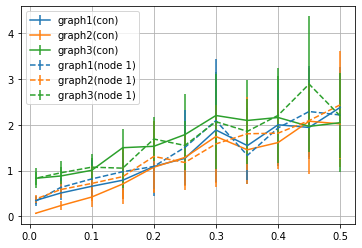

In [43]:
#plot the diagram of uniform noise
N100 = con_rm_uni['tridiag1']['N']
x = [(81*np.log10(100)/n) for n in N100]
plt.errorbar(x=x, y=con_rm_uni['tridiag1']['mean'], yerr=con_rm_uni['tridiag1']['std'], label='graph1(con)', color=color_map(0))
plt.errorbar(x=x, y=con_rm_uni['tridiag2']['mean'], yerr=con_rm_uni['tridiag2']['std'], label='graph2(con)', color=color_map(1))
plt.errorbar(x=x, y=con_rm_uni['tridiag3']['mean'], yerr=con_rm_uni['tridiag3']['std'], label='graph3(con)', color=color_map(2))

plt.errorbar(x=x, y=single_rm_uni['tridiag1']['mean'], yerr=single_rm_uni['tridiag1']['std'], label='graph1(node 1)', color=color_map(0), linestyle='--')
plt.errorbar(x=x, y=single_rm_uni['tridiag2']['mean'], yerr=single_rm_uni['tridiag2']['std'], label='graph2(node 1)', color=color_map(1), linestyle='--')
plt.errorbar(x=x, y=single_rm_uni['tridiag3']['mean'], yerr=single_rm_uni['tridiag3']['std'], label='graph3(node 1)', color=color_map(2), linestyle='--')
plt.legend()
plt.grid()
plt.show()

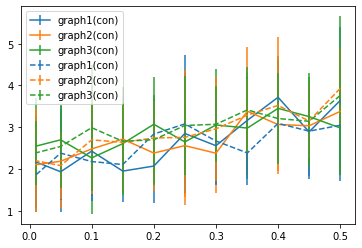

In [44]:
#plot the diagram of uniform noise
N100 = con_rm_uni['tridiag1']['N']
x = [(81*np.log10(100)/n) for n in N100]
plt.errorbar(x=x, y=con_rm_nonuni['tridiag1']['mean'], yerr=con_rm_nonuni['tridiag1']['std'], label='graph1(con)', color=color_map(0))
plt.errorbar(x=x, y=con_rm_nonuni['tridiag2']['mean'], yerr=con_rm_nonuni['tridiag2']['std'], label='graph2(con)', color=color_map(1))
plt.errorbar(x=x, y=con_rm_nonuni['tridiag3']['mean'], yerr=con_rm_nonuni['tridiag3']['std'], label='graph3(con)', color=color_map(2))

plt.errorbar(x=x, y=single_rm_nonuni['tridiag1']['mean'], yerr=single_rm_nonuni['tridiag1']['std'], label='graph1(con)', color=color_map(0), linestyle='--')
plt.errorbar(x=x, y=single_rm_nonuni['tridiag2']['mean'], yerr=single_rm_nonuni['tridiag2']['std'], label='graph2(con)', color=color_map(1), linestyle='--')
plt.errorbar(x=x, y=single_rm_nonuni['tridiag3']['mean'], yerr=single_rm_nonuni['tridiag3']['std'], label='graph3(con)', color=color_map(2), linestyle='--')
plt.legend()
plt.show()